In [20]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import sys
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import csv
from collections import Counter
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from itertools import chain, combinations
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
import time
from sklearn.cluster import AffinityPropagation
import re
from helper import *
from evaluate import *

In [21]:
# read in embeddings from ArcFace

# Experiment 1
arcface_embeddings = np.load("embeddings/experiment1/arcface/embeddings.npy")
arcface_raw_labels = np.load("embeddings/experiment1/arcface/names.npy")
# Experiment 2
# arcface_embeddings = np.load("embeddings/experiment2/arcface/ex2_arcface_embeddings.npy")
# arcface_raw_labels = np.load("embeddings/experiment2/arcface/ex2_arcface_names.npy")
# Experiment 3
# arcface_embeddings = np.load("embeddings/experiment3/arcface/ex3_arcface_embeddings.npy")
# arcface_raw_labels = np.load("embeddings/experiment3/arcface/ex3_arcface_names.npy")

arcface_raw_labels = decode(arcface_raw_labels)
arcface_raw_labels = [re.sub(".png", "", x) for x in arcface_raw_labels]
arcface_raw_labels = [re.sub(".jpg", "", x) for x in arcface_raw_labels]

print(arcface_embeddings.shape)
#print(arcface_raw_labels)

(2180, 512)


In [22]:
# read in embeddings from dlib

## Experiment 1
dlib_embeddings = np.load("embeddings/experiment1/dlib/ex1_dlib_embeddings.npy")
dlib_raw_labels = np.load("embeddings/experiment1/dlib/ex1_dlib_names.npy")

## Experiment 2
# dlib_embeddings = np.load("embeddings/experiment2/dlib/ex2_dlib_embeddings.npy")
# dlib_raw_labels = np.load("embeddings/experiment2/dlib/ex2_dlib_names.npy")

## Experiment 3
# dlib_embeddings = np.load("embeddings/experiment3/dlib/ex3_dlib_embeddings.npy")
# dlib_raw_labels = np.load("embeddings/experiment3/dlib/ex3_dlib_names.npy")

dlib_raw_labels = [re.sub(".png", "", x) for x in dlib_raw_labels]
dlib_raw_labels = [re.sub(".jpg", "", x) for x in dlib_raw_labels]
dlib_raw_labels = [re.sub("_", " ", x) for x in dlib_raw_labels]

print(dlib_embeddings.shape)

#print(dlib_raw_labels)

(2180, 128)


In [23]:
# read in embeddings from Openface

# Experiment 1
data = list(csv.reader(open("embeddings/experiment1/openface/ex1_openface_reps.csv")))
label_s = list(csv.reader(open("embeddings/experiment1/openface/ex1_openface_labels.csv")))

# Experiment 2
# data = list(csv.reader(open("embeddings/experiment2/openface/ex2_openface_reps.csv")))
# label_s = list(csv.reader(open("embeddings/experiment2/openface/ex2_openface_labels.csv")))

# Experiment 3
# data = list(csv.reader(open("embeddings/experiment3/openface/ex3_openface_reps.csv")))
# label_s = list(csv.reader(open("embeddings/experiment3/openface/ex3_openface_labels.csv")))


openface_embeddings = np.asarray(data, dtype=float)
openface_raw_labels = []

for i in range(len(label_s)):
    openface_raw_labels.append(label_s[i][1])

# Experiment 1
openface_raw_labels = [re.sub("./datasets/data1_aligned/", "", x) for x in openface_raw_labels]
# Experiment 2
#openface_raw_labels = [re.sub("./datasets/ex2_openface_aligned/", "", x) for x in openface_raw_labels]
# Experiment 3
#openface_raw_labels = [re.sub("./datasets/ex3_openface_aligned/", "", x) for x in openface_raw_labels]

openface_raw_labels = [re.sub("(?=\/).*$", "", x) for x in openface_raw_labels]
openface_raw_labels = [re.sub("_", " ", x) for x in openface_raw_labels]

print(openface_embeddings.shape)
#print(openface_raw_labels)

(2180, 128)


In [24]:
# read in embeddings from FaceNet",

# Experiment 1
# facenet_embeddings = np.load("embeddings/experiment1/facenet/ex1_facenet_embeddings.npy")
# label_strings = np.load("embeddings/experiment1/facenet/ex1_facenet_label_strings.npy")
# Experiment 2
# facenet_embeddings = np.load("embeddings/experiment2/facenet/ex2_facenet_embeddings.npy")
# label_strings = np.load("embeddings/experiment2/facenet/ex2_facenet_label_strings.npy")
# # Experiment 3
facenet_embeddings = np.load("embeddings/experiment3/facenet/ex3_facenet_embeddings.npy")
label_strings = np.load("embeddings/experiment3/facenet/ex3_facenet_label_strings.npy")
facenet_raw_labels = decode(label_strings)

print(facenet_embeddings.shape)

#print(facenet_raw_labels)

(4593, 512)


In [25]:
## Starting clustering and evaluation

#keys = ["tennis", "basketball", "golf", "fighter", "soccer"]


keys = ["tennis", "basketball", "golf", "military officer", "politician", \
       "manager", "soccer", "architect", \
       "coach", "actor", "lawyer", "entrepreneur", "fighter", "musician"]

# Get label/index dictionary
facenet_labels = get_labels_idx(keys, facenet_raw_labels)
openface_labels = get_labels_idx(keys, openface_raw_labels)
dlib_labels = get_labels_idx(keys, dlib_raw_labels)
arcface_labels = get_labels_idx(keys, arcface_raw_labels)

# Choose method
feature_extraction_method = "facenet"

if feature_extraction_method == "openface":

    X = openface_embeddings
    # Create ground truth pairs for evaulation
    true_label_pairs = create_label_pairs(openface_labels)
    
elif feature_extraction_method == "facenet":
    
    X = facenet_embeddings
    # Create ground truth pairs for evaulation
    true_label_pairs = create_label_pairs(facenet_labels)

elif feature_extraction_method == "dlib":
    
    X = dlib_embeddings
    # Create ground truth pairs for evaulation
    true_label_pairs = create_label_pairs(dlib_labels)
    
elif feature_extraction_method == "arcface":
    
    X = arcface_embeddings
    # Create ground truth pairs for evaulation
    true_label_pairs = create_label_pairs(arcface_labels)

NameError: name 'itertools' is not defined

In [15]:
c = 0
for key, value in facenet_labels.items():
    print(key)
    print(len(value))
    c+=len(value)
    
print(c)

print(len(facenet_labels))

print()

c = 0
for key, value in arcface_labels.items():
    print(key)
    print(len(value))
    c+=len(value)

print(len(arcface_labels))

print()

# c = 0
# for key, value in openface_labels.items():
#     print(key)
#     print(len(value))
#     c+=len(value)
    
# print(c)

# print(len(openface_labels))


# print()

# c = 0
# for key, value in dlib_labels.items():
#     print(key)
#     print(len(value))
#     c+=len(value)
    
# print(c)

# print(len(dlib_labels))

soccer
450
manager
371
musician
375
actor
403
entrepreneur
485
politician
449
fighter
537
military officer
407
coach
334
architect
388
lawyer
394
4593
11

golf
558
basketball
225
fighter
560
soccer
735
tennis
102
5



In [8]:
num_clusters = 5
num_iter = 10

evaluate_average(true_label_pairs, num_clusters, num_iter, "Kmeans")
print()
evaluate_average(true_label_pairs, num_clusters, num_iter, "HAC")
print()
evaluate_average(true_label_pairs, num_clusters, num_iter, "Spectral")
print()
evaluate_average(true_label_pairs, num_clusters, num_iter, "GMM")
print()
evaluate_average(true_label_pairs, num_clusters, num_iter, "Birch")

Kmeans Average F-Measure: 0.509
Kmeans Average Precision: 0.58
Kmeans Average Recall: 0.454
Kmeans Average Runtime: 2.37

HAC Average F-Measure: 0.413
HAC Average Precision: 0.459
HAC Average Recall: 0.376
HAC Average Runtime: 1.013

Spectral Average F-Measure: 0.466
Spectral Average Precision: 0.532
Spectral Average Recall: 0.415
Spectral Average Runtime: 1.352

GMM Average F-Measure: 0.508
GMM Average Precision: 0.579
GMM Average Recall: 0.452
GMM Average Runtime: 1.741

Birch Average F-Measure: 0.453
Birch Average Precision: 0.473
Birch Average Recall: 0.434
Birch Average Runtime: 2.69


In [ ]:
def evaluate_average(true_label_pairs, num_clusters, num_iter, algo):
    
    cumulative_f_measure = 0
    cumulative_precision = 0
    cumulative_recall = 0
    cumulative_runtime = 0
    
    for i in range(num_iter):
        
        if algo == "Kmeans":
        
            start = time.time()
            
            kmeans = KMeans(n_clusters = num_clusters).fit(X)
            
            runtime = round((time.time() - start), 3)
            
            k_means_clusters = get_clusters_dict(kmeans.labels_)
            cluster_label_pairs = create_label_pairs(k_means_clusters)
            
        elif algo == "HAC":
            start = time.time()
            
            clustering = AgglomerativeClustering(n_clusters=num_clusters, distance_threshold=None).fit(X)
            
            runtime = round((time.time() - start), 3)
            
            hac_clusters = get_clusters_dict(clustering.labels_)
            cluster_label_pairs = create_label_pairs(hac_clusters)
            
        elif algo == "Spectral":
            
            start = time.time()

            clustering = SpectralClustering(n_clusters=num_clusters).fit(X)
            
            runtime = round((time.time() - start), 3)

            spectral_cluster = get_clusters_dict(clustering.labels_)
            cluster_label_pairs = create_label_pairs(spectral_cluster)
        
        elif algo == "GMM":
            start = time.time()

            gmm_labels = GaussianMixture(n_components=num_clusters, init_params='kmeans').fit_predict(X)
            
            runtime = round((time.time() - start), 3)

            gmm_clusters = get_clusters_dict(gmm_labels)

            cluster_label_pairs = create_label_pairs(gmm_clusters)
            
        elif algo == "Birch":
            
            start = time.time()

            brc = Birch(n_clusters=num_clusters, compute_labels=True).fit(X) 

            birch_labels = brc.predict(X)
            
            runtime = round((time.time() - start), 3)

            birch_clusters = get_clusters_dict(birch_labels)

            cluster_label_pairs = create_label_pairs(birch_clusters)
            

        f_measure, precision, recall = evaluate(true_label_pairs, cluster_label_pairs)
            
        cumulative_f_measure += f_measure
        cumulative_precision += precision
        cumulative_recall += recall
        cumulative_runtime += runtime
    
    avg_f_measure = round(cumulative_f_measure/num_iter, 3)
    avg_precision = round(cumulative_precision/num_iter, 3)
    avg_recall = round(cumulative_recall/num_iter, 3)
    avg_runtime = round(cumulative_runtime/num_iter, 3)
            
    print("{} Average F-Measure: {}".format(algo, avg_f_measure))
    print("{} Average Precision: {}".format(algo, avg_precision))
    print("{} Average Recall: {}".format(algo, avg_recall))
    print("{} Average Runtime: {}".format(algo, avg_runtime))

In [16]:
# K-means 
num_clusters = 5

start_time = time.time()

kmeans = KMeans(n_clusters = num_clusters).fit(X)
#print(kmeans.labels_)

k_means_clusters = get_clusters_dict(kmeans.labels_)

# print(labels)
# print("\n")
# print(k_means_clusters)

kmeans_label_pairs = create_label_pairs(k_means_clusters)

#F-measure

#print(evaluate(true_label_pairs, kmeans_label_pairs))

# print("--- %s seconds ---" % (time.time() - start_time))

# print()

# # Hierarchical Agglomerative Clustering

# start_time = time.time()

# clustering = AgglomerativeClustering(n_clusters=num_clusters, distance_threshold=None).fit(X)
# hac_clusters = get_clusters_dict(clustering.labels_)

# hac_label_pairs = create_label_pairs(hac_clusters)

# f_measure(true_label_pairs, hac_label_pairs, "HAC")

# print("--- %s seconds ---" % (time.time() - start_time))

# print()


# # Spectral Clustering

# start_time = time.time()

# clustering = SpectralClustering(n_clusters=num_clusters).fit(X)

# spectral_cluster = get_clusters_dict(clustering.labels_)

# spectral_label_pairs = create_label_pairs(spectral_cluster)

# f_measure(true_label_pairs, spectral_label_pairs, )

# print("--- %s seconds ---" % (time.time() - start_time))

# print()

# # Gaussian Mixture EM

# start_time = time.time()

# gmm_labels = GaussianMixture(n_components=num_clusters, init_params='kmeans').fit_predict(X)

# gmm_clusters = get_clusters_dict(gmm_labels)

# gmm_label_pairs = create_label_pairs(gmm_clusters)

# f_measure(true_label_pairs, gmm_label_pairs)

# print("--- %s seconds ---" % (time.time() - start_time))

# print()

# # Birch

# start_time = time.time()

# brc = Birch(n_clusters=num_clusters, compute_labels=True).fit(X) 

# birch_labels = brc.predict(X)

# birch_clusters = get_clusters_dict(birch_labels)
    
# birch_label_pairs = create_label_pairs(birch_clusters)

# f_measure(true_label_pairs, birch_label_pairs)

# print("--- %s seconds ---" % (time.time() - start_time))

In [17]:
print(true_label_pairs[0])

print(kmeans_label_pairs[0])

(0, 1)
(0, 1)


In [22]:
# Find error pairs

true_positive = list(set(true_label_pairs).intersection(kmeans_label_pairs))
false_positive = list(set(kmeans_label_pairs) - set(true_label_pairs))
false_negative = list(set(true_label_pairs) - set(kmeans_label_pairs))

#print(true_positive[:200])
tp = true_positive[:200]

# print(false_positive[:100])
f = false_positive[:100]

# print(false_negative[:100])
n = false_negative[:100]

In [25]:
for pair in tp:
    print(facenet_raw_labels[pair[0]])
    print(facenet_raw_labels[pair[1]])
    print()

Peter Dewald manager
Reinhard Wolf manager

Kevin  Gray fighter
Roberto Sanchez fighter

Fyodor Tolbukhin military officer
Harald Sunde military officer

Ben Mulroney entrepreneur
Michael Cera entrepreneur

Almklausi musician
Kjell Andreassen musician

Hansi Schmidt coach
Joaquim Paüls i Bosch coach

Del Bausch politician
Fred Hochberg politician

Franco Iseppi manager
Pål Sæther Eiden manager

Justin Gaethje fighter
Ryan Spann fighter

Devin Clark fighter
Ryan Spann fighter

Jacob Tierney actor
Jason Priestley actor

Beneil Dariush fighter
Jimi Manuwa fighter

AdilRAMI soccer
MbarkBOUSSOUFA soccer

FrederikSCHRAM soccer
NemanjaMATIC soccer

Stefan Helleblad musician
Stewart Walker musician

Abel Trujillo fighter
Dong Hyun Kim fighter

Julio García Casas lawyer
William J. Hochul, Jr. lawyer

Alberto Uda fighter
Justin Willis fighter

Johnny Eduardo fighter
Rob Wilkinson fighter

Carlos Gebauer lawyer
Daniel Jacoby lawyer

Francisco Trinaldo fighter
Ian McCall fighter

Adriano Martins f

In [29]:
#print(facenet_raw_labels)

In [44]:
print(facenet_raw_labels.index("Peter Dewald manager"))
print(facenet_raw_labels.index("Reinhard Wolf manager"))

print(facenet_raw_labels.index("Roberto Sanchez fighter"))
print(facenet_raw_labels.index("Beneil Dariush fighter"))

plot_embeddings = []
plot_embeddings.append(facenet_embeddings[3473])
plot_embeddings.append(facenet_embeddings[3644])
plot_embeddings.append(facenet_embeddings[3752])
plot_embeddings.append(facenet_embeddings[496])

plot_labels = []

plot_labels.append(kmeans.labels_[3473])
plot_labels.append(kmeans.labels_[3644])
plot_labels.append(kmeans.labels_[3752])
plot_labels.append(kmeans.labels_[496])

print(plot_labels)

3473
3644
3752
496
[2, 2, 3, 3]


In [47]:
num_clusters = 2

kmeans = KMeans(n_clusters = num_clusters).fit(plot_embeddings)
print(kmeans.labels_)

print(kmeans.cluster_centers_)

[1 1 0 0]
[[ 0.05871351 -0.04238051 -0.00986817 ...  0.04270378 -0.06487975
  -0.02332413]
 [ 0.04565909  0.01504822 -0.03772811 ... -0.03019948  0.01700953
  -0.0500554 ]]


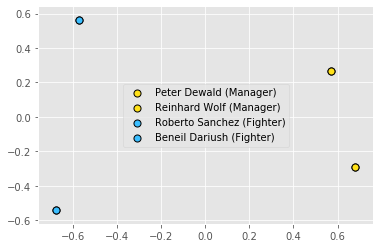

In [70]:
n = ['Peter Dewald (Manager)', 'Reinhard Wolf (Manager)','Roberto Sanchez (Fighter)', 'Beneil Dariush (Fighter)']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(plot_embeddings)
reduced_centroids = pca.fit_transform(kmeans.cluster_centers_)

colors = ["#ffe119", "#3bbeff", "#9A6324", "#3cb44b", "#e6194B", "#f58231", "#ffe119", "#469990", "#42d4f4", "#4363d8", "#911eb4"]


for i in kmeans.labels_:
    color = colors[i]
    for feature in principalComponents[kmeans.labels_ == i]:
        plt.scatter(feature[0], feature[1], marker="o", color=color, edgecolors='black',  s=50, linewidths=1)
    #plt.scatter(reduced_centroids[i][0], reduced_centroids[i][1], marker="o", color=color, edgecolors='black',  s=30, linewidths=1)

leg = plt.legend(n, loc="center")
c = ["#ffe119", "#ffe119", "#3bbeff", "#3bbeff"]

for i, j in enumerate(leg.legendHandles):
    j.set_color(c[i])
    j.set_edgecolor('black')
    
plt.savefig('plot.png')

plt.show()



In [ ]:
n = ['Peter Dewald (Manager)', 'Reinhard Wolf (Manager)','Roberto Sanchez (Fighter)', 'Beneil Dariush (Fighter)']


for i in kmeans.labels_:
    color = colors[i]
    for feature in subset_embeddings[subset_labels == i]:
      plt.scatter(feature[0], feature[1], marker="o", color=color, s=20, label=color)

leg = plt.legend(n, loc="lower right")
c=["g","r","c"]

for i, j in enumerate(leg.legendHandles):
    j.set_color(c[i])

plt.show()


In [ ]:
# # DBSCAN

# start_time = time.time()

# clustering = DBSCAN(eps=1, min_samples= 3).fit(X)
# DBSCAN_cluster = get_clusters_dict(clustering.labels_)

# print(clustering.labels_)
# print("\n")
# print(len(DBSCAN_cluster))
# print("\n")
# DBSCAN_label_pairs = create_label_pairs(DBSCAN_cluster)

# f_measure(true_label_pairs, DBSCAN_label_pairs, "DBSCAN")

# print("--- %s seconds ---" % (time.time() - start_time))

# print()

# # Affinity Propagation
# start_time = time.time()

# clustering = AffinityPropagation().fit(X)

# ap_clusters = get_clusters_dict(clustering.labels_)

# print(len(ap_clusters))

# ap_label_pairs = create_label_pairs(ap_clusters)

# f_measure(true_label_pairs, ap_label_pairs, "Affinity Porpagation")

# print("--- %s seconds ---" % (time.time() - start_time))

# print()

# # Mean shift

# start_time = time.time()

# clustering = MeanShift(bandwidth=1).fit(X)

# mean_shift_cluster = get_clusters_dict(clustering.labels_)

# print(clustering.labels_)
# print("\n")
# print(len(mean_shift_cluster))
# print("\n")
# mean_shift_label_pairs = create_label_pairs(mean_shift_cluster)

# f_measure(true_label_pairs, mean_shift_label_pairs, "Mean Shift")

# print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(X)
# reduced_centroids = pca.fit_transform(kmeans.cluster_centers_)

# colors = ["#ffe119", "#f032e6", "#9A6324", "#3cb44b", "#e6194B", "#f58231", "#ffe119", "#469990", "#42d4f4", "#4363d8", "#911eb4"]

# # plt.scatter(X[:,0], X[:,1], s=5)

# for i in kmeans.labels_:
#     color = colors[i]
#     for feature in principalComponents[kmeans.labels_ == i]:
#         plt.scatter(feature[0], feature[1], marker="x", color=color, s=5, linewidths=5)
#     plt.scatter(reduced_centroids[i][0], reduced_centroids[i][1], marker="o", color=color, edgecolors='black',  s=30, linewidths=1)

# plt.show()